In [10]:
# PART A: Implement Metropolis Algotihm
import numpy as np
import matplotlib.pyplot as plt   

In [11]:
def log_target_density(x):
    return -0.5 * x**2

In [13]:
def metropolis_sampler(log_pi, x0,n_samples=10_000,proposal_std=1.0, burn_in=1_000,thinning=1):
    total_iters = burn_in + n_samples * thinning
    samples = []
    x_current = x0
    accept_count = 0

    for t in range(total_iters):
        # Propose candidate from normal random walk
        x_proposed = np.random.normal(loc=x_current, scale=proposal_std)

        # Compute log acceptance ratio
        log_alpha = log_pi(x_proposed) - log_pi(x_current)

        # Accept / reject
        if np.log(np.random.rand()) < log_alpha:
            x_current = x_proposed
            accept_count += 1

        # After burn-in, store every 'thinning'-th sample
        if t >= burn_in and ((t - burn_in) % thinning == 0):
            samples.append(x_current)

    samples = np.array(samples)
    acceptance_rate = accept_count / total_iters
    return samples, acceptance_rate

Acceptance rate: 0.711
Sample mean (should be ~0): 0.048
Sample variance (should be ~1): 0.998


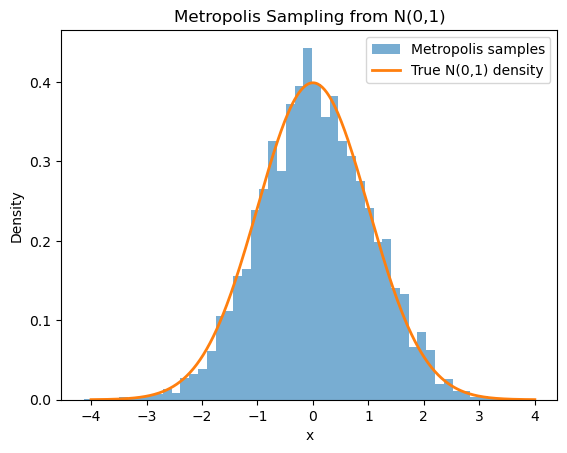

In [14]:
if __name__ == "__main__":
    np.random.seed(42)

    # Run Metropolis
    samples, acc_rate = metropolis_sampler(
        log_pi=log_target_density,
        x0=0.0,
        n_samples=10_000,
        proposal_std=1.0,
        burn_in=1_000,
        thinning=1
    )

    print(f"Acceptance rate: {acc_rate:.3f}")
    print(f"Sample mean (should be ~0): {samples.mean():.3f}")
    print(f"Sample variance (should be ~1): {samples.var():.3f}")

    # Plot histogram vs true density
    xs = np.linspace(-4, 4, 400)
    true_pdf = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * xs**2)

    plt.figure()
    plt.hist(samples, bins=50, density=True, alpha=0.6, label="Metropolis samples")
    plt.plot(xs, true_pdf, linewidth=2, label="True N(0,1) density")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()
    plt.title("Metropolis Sampling from N(0,1)")
    plt.show()

In [15]:
# PART B: Deterministic Model
import numpy as np

def normal_pdf(x, mu=0.0, sigma=1.0):
    return (1.0 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu)/sigma)**2)

# Deterministic approximation of E[X^2] under N(0,1)
xs = np.linspace(-5, 5, 10_000)  # fine grid
pdf_vals = normal_pdf(xs)

# Normalize just in case (numerical integration)
dx = xs[1] - xs[0]
pdf_vals = pdf_vals / (pdf_vals.sum() * dx)

# Compute expectation of X^2 deterministically
ex2_deterministic = np.sum(xs**2 * pdf_vals) * dx
print(f"Deterministic E[X^2] ≈ {ex2_deterministic:.5f}")

Deterministic E[X^2] ≈ 0.99999


In [16]:
# Using samples from Metropolis:
ex2_mc = np.mean(samples**2)
print(f"Monte Carlo (Metropolis) E[X^2] ≈ {ex2_mc:.5f}")
print("True value for N(0,1) is 1.0")

Monte Carlo (Metropolis) E[X^2] ≈ 1.00067
True value for N(0,1) is 1.0
